# Tujuan yang ingin di capai
Optimasi Campaign Results terkait penawaran produk baru,sehingga mendapatkan profit yang maksimal di bulan depan dan memahami karakteristik customers yang menerima penawaran produk baru tersebut.

 # Data Quality Check
- Q1: Apakah ada features yang data type-nya tidak sesuai?
- Q2: Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?
- Q3: Apakah terdapat distribusi yang tidak masuk akal?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#untuk mengatur agar columns nya tidak ke hidden
pd.set_option('display.max_columns', None)

sns.set_context('notebook')
sns.set_style('whitegrid')
#sns.set_palette('Spectral')
sns.set_palette('Spectral')

import warnings
warnings.filterwarnings('ignore')

#df = pd.read_csv('Documents/belajar/data-analyst/Marketing-Analytics-main/marketing_data.csv')
df = pd.read_csv('marketing_data.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [2]:
df.shape

(2240, 28)

## Pertanyaan 1
Apakah ada features yang data type-nya tidak sesuai?


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Disini kita bisa melihat kolom-kolom apa saja yang dataset kita punya.
Di Dataset kita ada sebanyak 28 columns,dan kita juga bisa melihat data type nya,ada ID,Year_Birth,Education,dan lain lain.

Disini kita harusnya mengecek satu persatu untuk data type nya,apakah ID itu integer,dan itu benar,dan disini income data type nya object,harusnya data type nya integer atau float,disini juga ada Dt_Customer,ini harusnya datatype nya berupa tanggal bukan object.

In [4]:
# Kesimpulan : Income,Dt_Customer

Selain menggunakan ```df.info``` untuk menemukan datatype nya ini sesuai atau tidak sesuai,kita juga bisa menggunakan looping sederhana.

In [5]:
for dtype, col in (list(zip(df.dtypes, df.columns))):
    if dtype == 'int64' or dtype == 'float64':
        print(col, dtype)
        print(df[col].min(), df[col].max())
    else:
        print(col, dtype)
        print(df[col].unique())
    print()
    

ID int64
0 11191

Year_Birth int64
1893 1996

Education object
['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']

Marital_Status object
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']

 Income  object
['$84,835.00 ' '$57,091.00 ' '$67,267.00 ' ... '$46,310.00 ' '$65,819.00 '
 '$94,871.00 ']

Kidhome int64
0 2

Teenhome int64
0 2

Dt_Customer object
['6/16/14' '6/15/14' '5/13/14' '5/11/14' '4/8/14' '3/17/14' '1/29/14'
 '1/18/14' '1/11/14' '12/27/13' '12/9/13' '12/7/13' '10/16/13' '10/5/13'
 '9/11/13' '8/1/13' '7/23/13' '7/1/13' '5/28/13' '3/26/13' '3/15/13'
 '2/12/13' '11/23/12' '10/13/12' '9/14/12' '6/29/14' '5/31/14' '5/30/14'
 '4/27/14' '4/11/14' '10/29/13' '10/9/13' '5/10/13' '5/9/13' '4/25/13'
 '4/20/13' '3/30/13' '3/1/13' '2/14/13' '1/11/13' '1/3/13' '12/19/12'
 '12/15/12' '12/2/12' '9/17/12' '9/11/12' '5/12/14' '4/28/14' '3/29/14'
 '3/6/14' '3/4/14' '2/4/14' '2/3/14' '1/1/14' '12/12/13' '11/15/13'
 '9/20/13' '9/5/13' '8/31/13' '7/30/13' '7/27/13' '6/22/1

**Disini ada typo sedikit,kita harus memperbaiki ini**

Jadi disini Kita akan membersihkan semua nama kolom yang mempunyai spasi atau whitespace yang ga berguna

In [6]:
#df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.strip()  # Hanya menghapus spasi di awal/akhir

In [7]:
df.Income

0       $84,835.00 
1       $57,091.00 
2       $67,267.00 
3       $32,474.00 
4       $21,474.00 
           ...     
2235    $66,476.00 
2236    $31,056.00 
2237    $46,310.00 
2238    $65,819.00 
2239    $94,871.00 
Name: Income, Length: 2240, dtype: object

**KIta juga perlu melakukan replace income untuk dolar sign dan juga koma nya,karena koma dan dollar sign Income ini penyebab data type Income  menjadi Object**

In [8]:
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')

In [9]:
df.Income

0       84835.00 
1       57091.00 
2       67267.00 
3       32474.00 
4       21474.00 
          ...    
2235    66476.00 
2236    31056.00 
2237    46310.00 
2238    65819.00 
2239    94871.00 
Name: Income, Length: 2240, dtype: object

**Selanjutnya kita ubah menjadi float**

In [10]:
df['Income'] = df['Income'].astype('float')

**KIta juga perlu mengubah Dt_Customer dari Object menjadi datetime**

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

**Sekarang kita lihat lagi dengan df.info()**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

**Disini Dt_Customer nya sudah menjadi datetime dan juga Income nya sudah menjadi float.**

## Pertanyaan 2
Adakah duplicate, missing values atau outliers? Bagaimana mengatasi hal-hal tersebut?

### Duplicates
Di dalam pandas, cara kita untuk mengecek apakah di suatu kolom atau di suatu dataframe ada duplicate atau tidak,kita bisa menggunakan function duplicated

In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

Disini kita langsung di berikan nilai ```False```,apakah row pertama dan row kedua itu sama atau ada yang mirip dengan yang lain,jika nilai nya ```False``` berarti tidak ada dan jika ```True``` itu artinya ada.

Karena di dalam pemrograman ```False``` itu bernilai 0 dan ```True``` ini bernilai 1,maka kita bisa melakukan ```sum```,jika ini terdapat duplicated maka ```sum``` nya akan bernilai lebih dari 0,dan jika nilai nya 0 maka tidak ada duplicated.

In [14]:
df.duplicated().sum()

0

### Missing Values

In [15]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Country                 0
dtype: int64

Bisa kita lihat,kita hanya memiliki satu features yang memiliki missing values,yaitu Income.


Pertanyaaan nya,apakah missing values ini mustahil jika customer kita tidak memiliki income?.Kemungkinan besar kan kurang mustahil,pasti orang-orang yang membeli produk kita itu pasti punya income,jadi kita harus mengisi nilai missing values ini.


Untuk mengisi nilai Missing values ini,kita dapat mengisi nya dengan mean ataupun median.

Pertanyaan nya,mana yang paling tepat?,apakah mean atau median?

Pertanyaan ini bisa kita jawab ketika kita sudah melihat distribusi dari Income ini.

<Axes: xlabel='Income'>

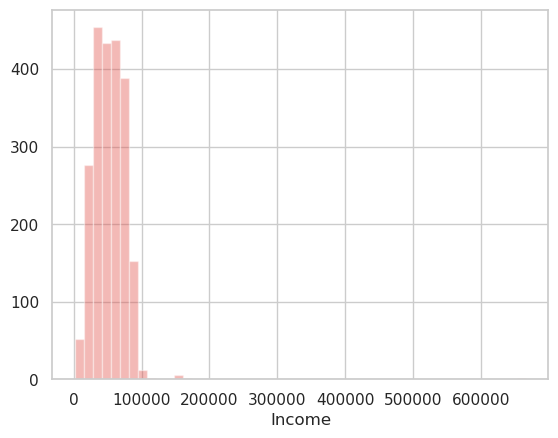

In [16]:
sns.distplot(df['Income'], kde=False, hist=True)

Disini bisa kita lihat ada salah satu box kecil yang artinya kita memiliki outliers.

Atau kita bisa mem plot nya secara lebih bagus dengan menggunkan box plot.

<Axes: >

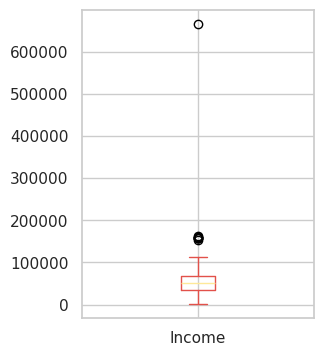

In [17]:
df['Income'].plot(kind='box', figsize=(3,4))

Disini terdapat outlier yang sangat jauh,oleh karena itu untuk mengisi missing values di Income kita akan menggunakan median,karena median itu tahan banting terhadap missing values.

In [18]:
df['Income'] = df['Income'].fillna(df['Income'].median())

### Outliers
Karena kita sudah melakukan pengecekan terhadap seluruh nilai unique untuk object,kita bisa melihatnya secara langsung dari lopping di atas.

Untuk variabel numerik atau continous,kita akan melihatnya dengan boxplot,karena itu lebih mudah.

In [19]:
df_to_plot = df.select_dtypes(include=['float','int'])
df_to_plot.drop(columns=['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                               'AcceptedCmp4', 'AcceptedCmp5', 'Response' , 'Complain'],
               inplace=True)

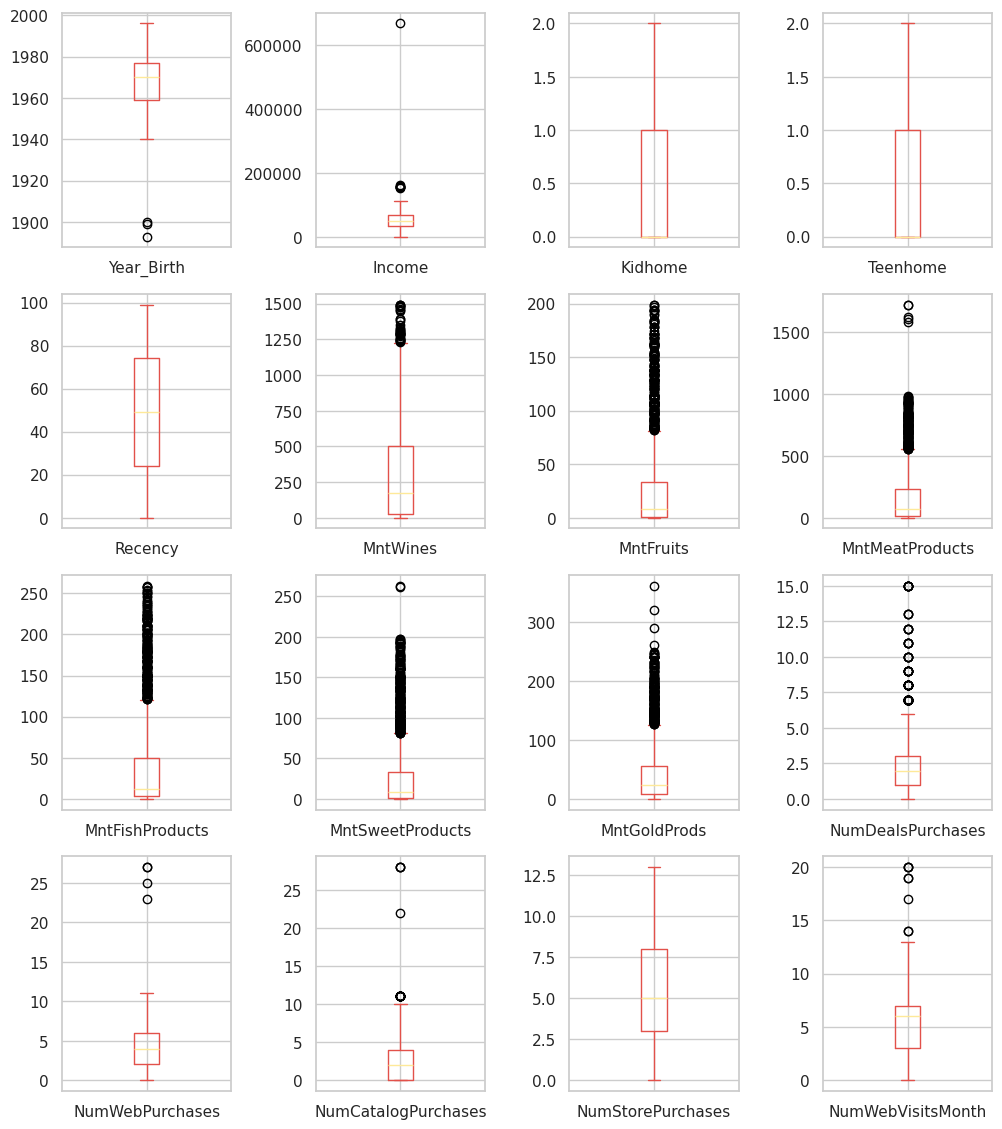

In [20]:
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14))
plt.subplots_adjust(wspace=0.5);

Disini kita bisa lihat di Year_Birth,itu ada orang yang lahir sebelum tahun 1900,ini kurang masuk akal,karena apakah mungkin ada orang yang masih hidup sudah lebih dari 120 tahun,kita akan meremove orang-orang yang lahir sebelum tahun 1940 karena itu gak masuk akal,mungkin mereka typo.

Untuk Income masih masuk akal,karena mungkin saja ada orang yang sangat-sangat kaya dan ada yang biasa-biasa saja.

Dan untuk yang lainnya terlihat baik dan tidak ada yang aneh,karena tidak ada yang kurang dari 0,,kalau kurang dri 0 itu kurang masuk akal juga.

Untuk Outliers kita hanya menemukan satu saja,sebenarnya banyak outliers nya,tapi kebanyakan itu outliers masuk akal jadi kita biarkan saja.Untuk outliers yang tidak masuk akal disini hanya Year_Birth saja,jadi kita akan meremove Year_Birth ini.

In [21]:
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)

## Pertanyaan 3
Apakah terdapat distribusi yang tidak masuk akal?

Untuk menjawab pertanyaan ini,kita akan melihat nya secara histogram bukan secara boxplot,karena boxplot lebih enak untuk melihat outliers.Maka dari itu kita akan melihat seluruh distribusi,seluruh variabel-variabel numerik atau continous secara histogram.

Untuk melakukan itu,kita harus tahu dulu kolom yang akan kita gunakan untuk mem plot nya.

In [22]:
numeric = df_to_plot.columns

In [23]:
numeric

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

Ini adalah kolom-kolom yang akan kita plot untuk mencari tahu distribusi

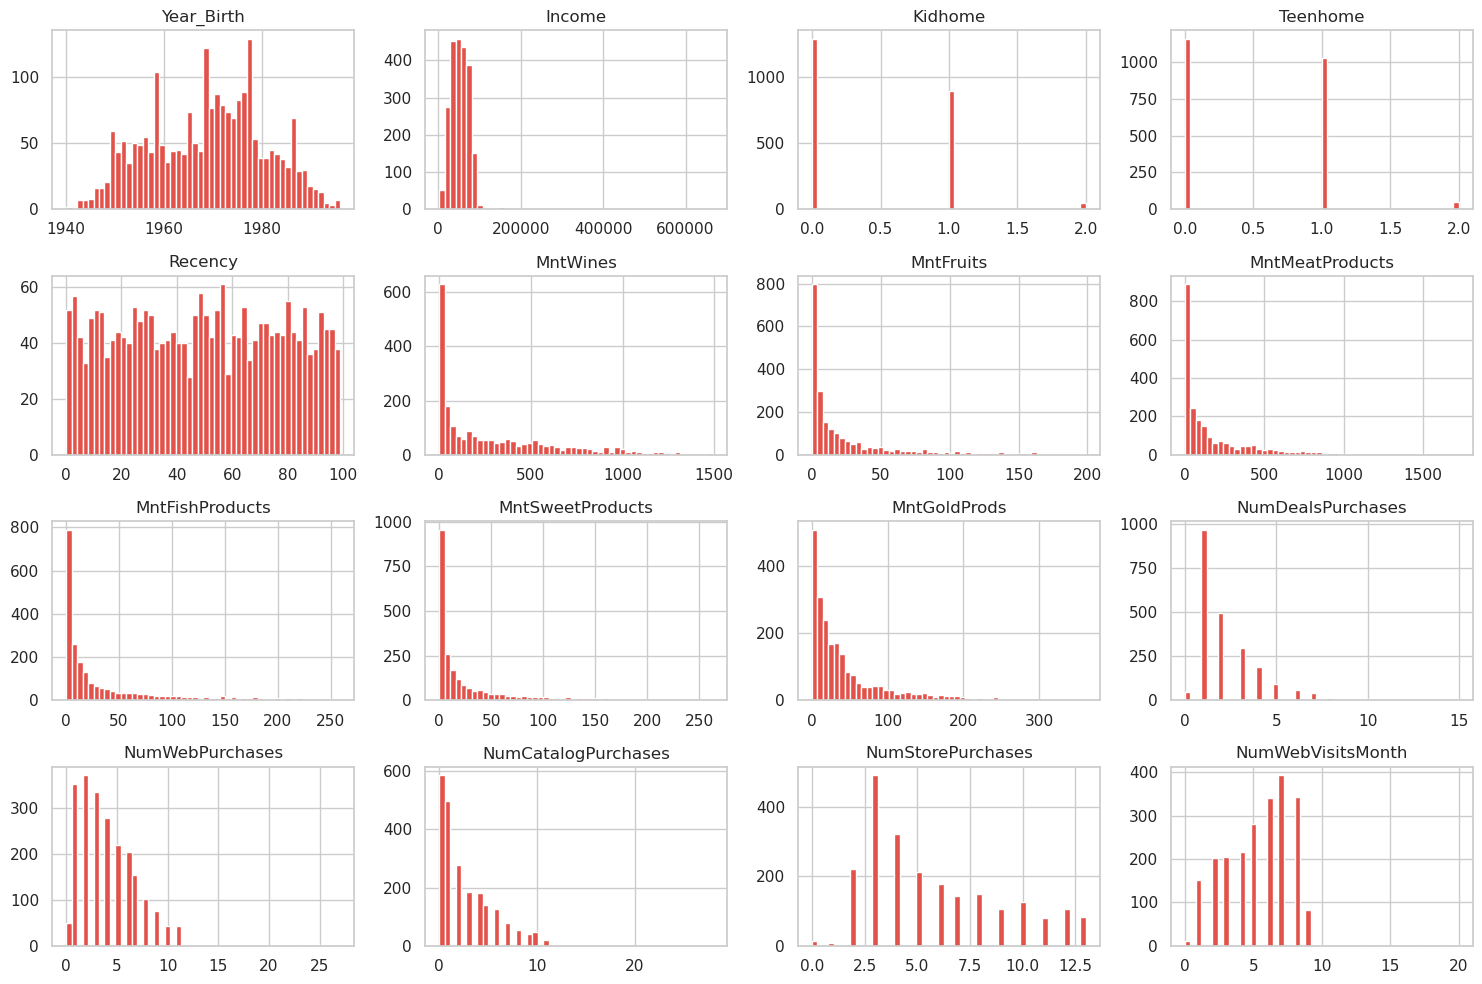

In [24]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

df.hist(bins=50, ax=ax, layout=(4,4), column=numeric)
plt.tight_layout()
plt.show()

Kurang lebih secara distribusi itu juga aman,jadi kesimpulan dari apakah ada distribusi yang tidak masuk akal adalah tidak ada.

# Data Insight
Sebalumnya kita sudah membahas Terkait Data Quality.

Sekarang kita masuk ke tahapan Data Exploratory yang lain,yaitu Data Insight

Dimana untuk Data Insight ini kita akan melihat semua insight dari semua kolom yang ada,dan kita akan melihat apakah ada suatu patern dari kolom-kolom ini dengan variabel target kita,yaitu Respons.

Karena kita ingin melihat data insight dari semua kolom yang ada,kita perlu tahu dulu kolom-kolom apa saja yang kita punya,kita dapat melihatnya dengan ```df.head()```

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


Disini kita melihat ada kolom ID,Year_Birth,Education,dan sampai ke country.

KIta akan mulai dari ujung paling kiti dulu yaitu ID,untuk ID,karena ini hanya untuk indexing,tidak memaknai apa-apa,maka kita bisa mengabaikan nya,kita tidak perlu melakukan analisis untuk kolom ID ini.

Dan untuk Year_Birth,kita bisa melihat di rentang umur berapa sih yang paling banyak menerima penawaran campaign ini,atau dengan kata lain response nya 1.

Maka dari itu,untuk menganalisis pertanyaan itu,kita perlu membuat suatu kolom baru,yaitu kolom umur,kolom umur ini bisa di buat dari Year_Birth dan DT_Customers

## Year_Birth
Disini karena kita akan membuat suatu kolom baru atau bisa di katakan ini adalah tahapan feature engonnering,kita melakukan feature enginnering disini,Dimana kolom yang pertama itu adalah Year_Birth,nanti untuk mendapatkan umur si client,maka kita perlu mengambil tahun dari kolom Dt_Customer,untuk mengambil tahun dari Dt_Customer itu kita dapat melakukan ini:

In [26]:
df['Dt_Customer'].dt.year

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2232    2013
2233    2013
2234    2012
2235    2012
2236    2012
Name: Dt_Customer, Length: 2237, dtype: int32

Kenapa kita bisa mengambil tahun dari Dt_Customer??,karena Dt_Customer ini data type nya sudah datetime sudah bukan object atau yang lainnya,maka dari itu kita bisa mengambil year nya secara mudah.

In [27]:
df['Dt_Customer'].dt.year - df['Year_Birth']

0       44
1       53
2       56
3       47
4       25
        ..
2232    37
2233    36
2234    36
2235    34
2236    43
Length: 2237, dtype: int64

Disini kita sudah mendapatkan umur dari client,tapi pertanyaan nya,ini umur client ketika apa??.

Karena kita menggunakan tahun dari Dt_Customer,maka bisa di bilang ini adalah umur client ketika dia mendaftar di perusahaan kita ini.Bisa kita lihat juga di dictionary nya,Dt-Customer adalah tanggal ketika dimana client mendaftar di perusahaan kita ini.Maka dari itu, ini adalah umur customer ketika pertama kali masuk atau mendaftar di perusahaan kita atau membeli suatu barang.

Oleh karena itu kita bisa bilang

In [28]:
df['Customer_Age']  = df['Dt_Customer'].dt.year - df['Year_Birth']

Sampai disini,pembuatan kolom umur atau customer age sudah berhasil,maka selanjutnya kita akan melakukan visualisasi,di visualisasi ini kita akan membuat histogram dengan menggunakan seaborn.

<Axes: xlabel='Customer_Age', ylabel='Count'>

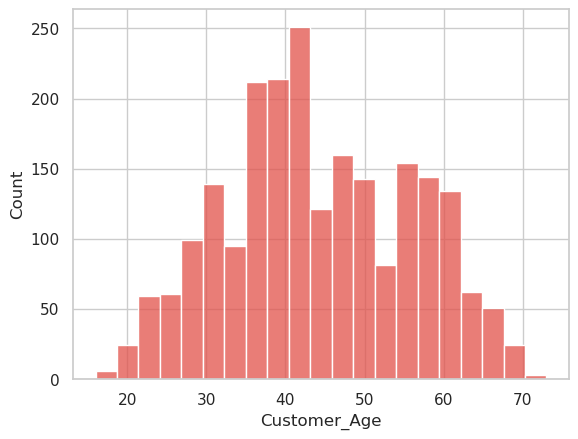

In [29]:
sns.histplot(data=df, x='Customer_Age')

Disini kita bisa melihat bahwa rata-rata itu berada di rentang umur 40 an,tapi disini saya mau melihat distribusi umur antara customer,atau distribusi 0 berdasarkan kolom responss,Untuk melihat distribusi berdasarkan  kolom response,kita dapat melihat nya dengan menggunakan ```hue```:

<Axes: xlabel='Customer_Age', ylabel='Count'>

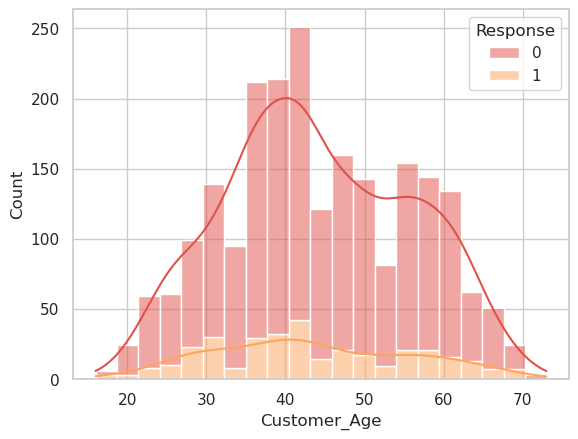

In [30]:
sns.histplot(data=df, x='Customer_Age', hue='Response', multiple='stack', kde=True)

Disini kita bisa melihat bahwa distribusi itu hampir normal distibusi,sedangkan untuk yang response nya sama dengan 1 atau yang menerima penawaran campaign kita,itu distibusi nya bisa di lihat juga di atas.

Ini kurang lebih sama,kita tidak mendapat informasi yang signifikan, karena kita tidak melihat adanya perbedaan antara distribusi umur berdasarkan response.

Tapi bisa di lihat rata-rata customer kita itu berada di rentang 40 an.

## Education
Didalam Education ini,karena dia itu berisikan string,maka kita lihat dulu nilai uniq dari kolom ini.

In [31]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

Nilai uniq ini kurang lebih ada 5 nilai uniq values.Tapi untuk PhD sama Master,ini sudah sanat jelas sekali kan itu lulusan Phd dan Master,tapi untuk yang lainnya kita tidak tahu artinya apa,mungkin Basic hanya lulusan SMP atau SMA,dan untuk 2n Cycle mungkin itu under graduate 1,tapi untuk hal-hal seperti ini ada baiknya langsung tanya ke orang yang tau arti dari nilai value ini.

Tapi disini kita tidak tau dan di dataset nya tidak ada penjesalan nya,kita abaikan dulu.

Selanjutnya kita mau melihat untuk Education Customer kita itu paling banyak berasal dari Education apa??,apakah paling banyak lulusan Phd,Master atau apa.

<Axes: xlabel='Education', ylabel='count'>

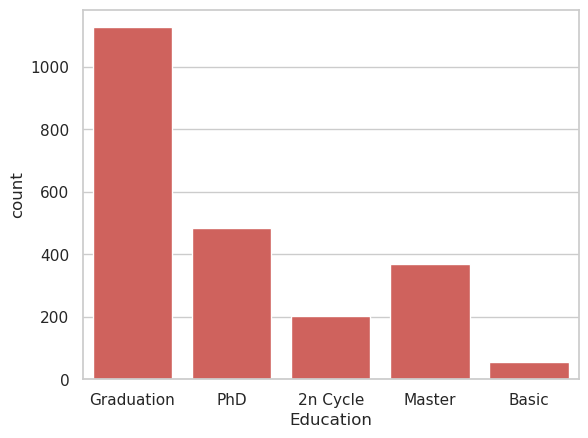

In [32]:
sns.countplot(data=df, x='Education')

Disini bisa kita lihat bahwa ternyata customer kita itu paling banyak lulusan Graduation

Tapi kita juga selalu ingin melihat hubungan dengan target variabel yaitu response,maka kita akan menambahkan ```hue```

<Axes: xlabel='Education', ylabel='count'>

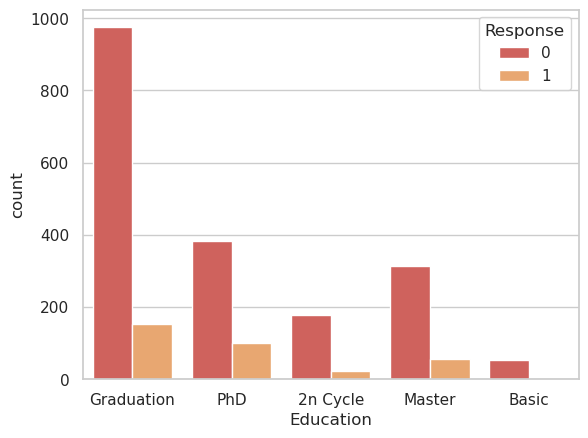

In [33]:
sns.countplot(data=df, x='Education', hue='Response')

Disini dapat dilihat,untuk Graduation,barcode nya kurang lebih seperti di atas,tapi karena ini tidak ada angka untuk mengetahui berapa persen client kita yang lulusan graduation menerima penawaran campaign kita,maka dari itu disini saya buat function untuk menampilkan persentase nya.

In [34]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

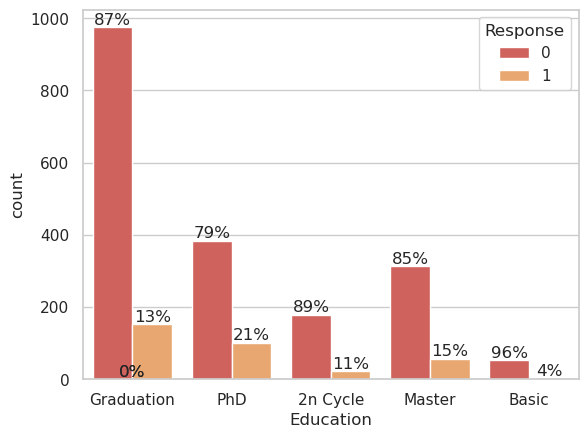

In [35]:
ax = sns.countplot(x='Education', hue='Response', data=df)
barPerc(df, 'Education', ax)

# Phd memiliki ketertarikan paling tinggi untuk menerima penawaran campaign

Dsini kita sudah mendapatkan persentase nya,dimana untuk graduation ada sekitar 13% yang menerima atau yang mengambil penawaran campaign kita,ternyata bahwa PhD itu paling tinggi dari total keseluruhan customer kita yang lulusan PhD itu ada 21% yang menerima penawaran campaign kita,atau bisa di bilang rata-rata ada kecenderungan ketika customer kita itu udah lulusan PhD itu lebih banyak yang bakal menerima campaign kita,Karena bisa kita lihat dari visualisasi kita.Dan untuk Basic itu adalah yang paling sedikit.

Selain dari Education,karena disini juga kolom yang ke 5 adalah Income,maka kita bisa menghubungkan Income dengan Education,kan biasanya kalau misalkan Education nya makin tinggi pasti Income nya juga makin tinggi.

Kita akan melihat korelasi antara Education dengan Icoome dan juga target variabel kita taitu response,untuk melakukan itu kita bisa melakukan:

(0.0, 175000.0)

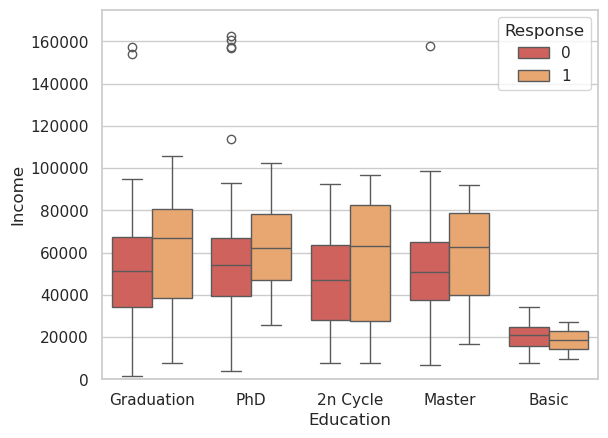

In [36]:
sns.boxplot(data =df , x='Education', y='Income', hue='Response')
plt.ylim(0, 175000)

# Income yang lebih tinggi cenderung menerima/membeli penawaran campaign

Disini kita dapat melihat untuk Graduation,PhD,2n Cycle dan juga Master,itu rata-rata memiliki Income yang sama,tapi disini ada satu interisting yang menarik,bahwa untk customer yang menerima atau membeli penawaran campaign kita itu memiliki rata-rata Income yang lebih tinggi,coba lihat box yang berwarna orange,mean nya itu selalul lebih tinggi dari pada customer yang lulusan Graduation tapi tidak mengambil penawaran campaign kita.

Disini kita dapat melihat bahwa Income yang lebih tinggi cenderung menerima atau membeli penawaran campaign.

## Marital Status
Seperti biasa kita harus melihat dulu kolom nya.

In [37]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [38]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

Marital Status ini sudah jelas ini adalah status perkawinan,disini ada Divorced,Single,Married,Together,Single,dan lain lain.

Disini secara logika,pasti YOLO,Alone,dan Absurd itu mungkin sama,maka dari itu disini kita akan menganggap bahwa ketika ini adalah single,untuk melakukan itu kita dapat melakukan seperti ini:

In [39]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

JIka kita lihat ini akan berubah

In [40]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

Selanjutnya kita akan melakukan visualisasi dengan hal yang sama seperti Education,namun kita akan mengubah X nya menjadi Marital_Status.

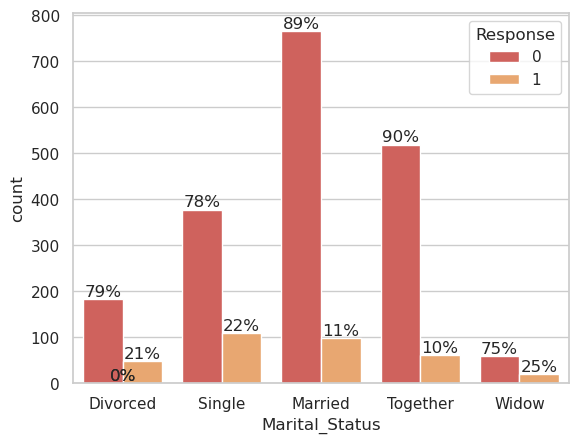

In [41]:
ax = sns.countplot(x='Marital_Status', hue='Response', data=df)
barPerc(df, 'Marital_Status', ax)

# Ada kecenderungan jika customer tinggal sendiri/membiayai sendiri hidup cenderung membeli/menerima penawaran campaign

Disini kita bisa melihat ada hal yang menarik untuk Divorced,Single dan Widow,itu melebihi 20%,dari total keseluruhan per Marital Status,sedangkan Married,dan Together itu hanya sekitar 10-11%.

Dari sini kita sudah mendapatkan insight baru,dari sini saja kita dapat melihat orang-orang yang cenderung tinggal sendiri ada kecenderungan membeli atau menerima penawaran campaign.

## Kidhome + Teenhome
Kita sebenarnya bisa membuat satu variabel baru,kita akan melakukan feature engineering karena Kidhome ini kan banyak nya anak,atau banyak nya remaja di rumah,dan kita bisa saja membuat suatu kolom batu untki berapa sih jumlah anak yang di miliki customer kita punya.

In [42]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,25


In [43]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']

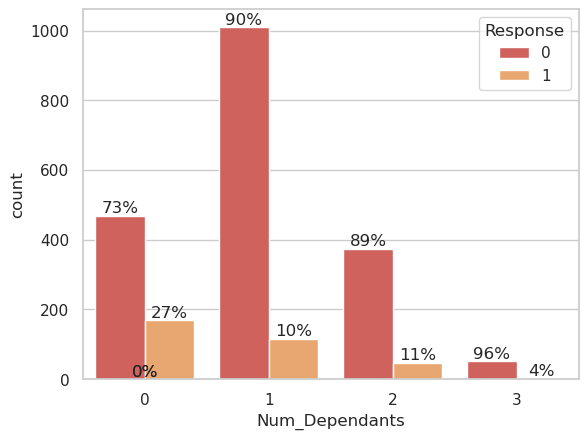

In [44]:
ax = sns.countplot(x='Num_Dependants', hue='Response', data=df)
barPerc(df, 'Num_Dependants', ax)

# Customer yang tinggal sendiri cenderung menerima penawaran campaign

Disini kita dapat melihat,customer yang tidak memiliki anak atau tidak memiliki tanggungan itu sangat besar sekali,kemungkinan dia akan membeli itu sebesar 27%,sedangkan yang memiliki anak cenderung menurun.

Jadi kita bisa bilang,customer yang tinggal sendiri cenderung menerima penawaran campaign.

Dari tolal sekitar 700 an itu 27% dari 700 itu membeli atau menerima penawaran campaign kita,sedangkan di banding yang lain itu sangat sedikit sekali.

## Customer Join Date
Di dalam Custemer Join Date ini kita juga bisa membuat satu kolom baru lagi yaitu ```Dt_Customer_Month```,dan ```Dt_Customer_Year```

In [45]:
df['Dt_Customer_Month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_Year'] = df['Dt_Customer'].dt.year

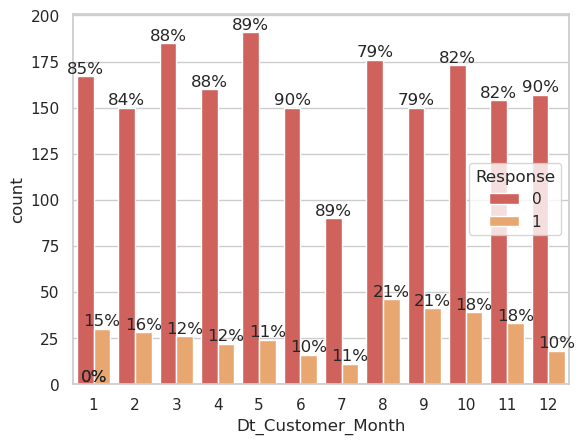

In [46]:
ax = sns.countplot(x='Dt_Customer_Month', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Month', ax)

Disini kita dapat melihat untuk Dt_Customer_Month,ada satu hal menarik,untuk bukan dari tanggal 8 sampai dengan 11,itu persentase nya cukup tinggi di bandingkan ketika sudah masuk bulan 12,bulan awal sampai bulai ke 7.

Dan untuk tahun,kita bisa melihat nya dengan:

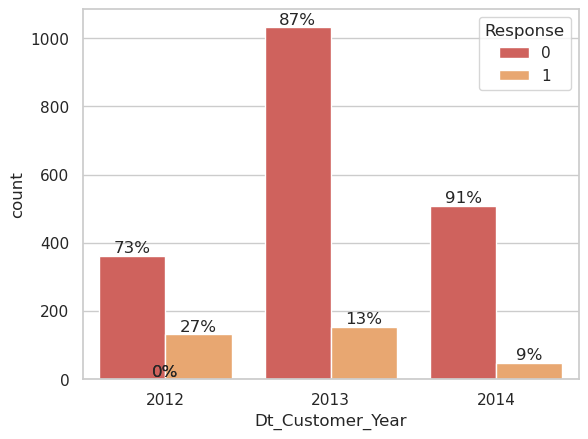

In [47]:
ax = sns.countplot(x='Dt_Customer_Year', hue='Response', data=df)
barPerc(df, 'Dt_Customer_Year', ax)

# Semakin lama customer sudah join, maka semakin besar kemungkinan customer akan menerima penawaran campaign

Untuk tahun ini juga sama,ada suatu hal yang menarik,semakin lama customer kita itu join,semakin besar kemungkinan customer itu akan menerima penawaran campaign kita.

Bisa kita lihat di persentase bahwa dari keseluruhan customer kita yang join pada tahun 2012,27% nya itu menerima penawaran campaign kita.

Sedangkan 2013 itu hanya 13% dari total customer yang menerima penawaran campaign kita.

Jadi bisa kita bilang,semakin lama customer sudah join,maka semakin besar kemungkinan customer akan meneroma penawaran campaign

## Recency
untuk kolom recency ini kita hanya akan melihat histogram plot nya saja.Yaitu antara recency dengan kolom response atau variabel target kita.

<Axes: xlabel='Recency', ylabel='Count'>

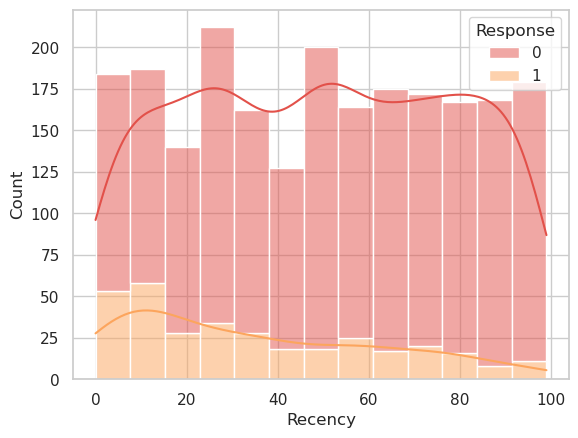

In [48]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True)

# Customer yang belum lama membeli, maka cenderung menerima penawaran campaign terbaru

Disini bisa kita lihat secara detail distribusi recency untuk response sama dengan 0 dan distribusi recency untuk response sama dengan 1.

Kedua distribusi untuk masing-masing nilai response ini sangat berbeda,untuk response sama dengan 0,distribusi recency nya itu cukup flat,pertama dari sekitar 150,sampai 75 turun kagi dan naik lagi.

dan untuk recency ketika response sama dengan 1,itu recency nya banyak customer yang memiliki nilai recency nya rendah,Dimana recency itu sendiri dan definisinya adalah **Number of days since the last purchase**,dengan kata lain kita dapat katakan,ketika customer ini belum lama purchase di perusahaan kita,maka customer ini cenderung akan menerima penawaran campaign terbaru kita,kita bisa bilang seperti itu.

## Amount Spent
Bisa kita lihat di dataset kita ini banyak sekali kolom-kolom **Mnt**,seperti **MntWines,MntFruits,MntMeatProducts,dan lain lain**,Dimana kolom-kolom ini sebenarnya adalah kolom-kolom **Amount Spent**,tapi dengan berbagai jenis produk yang berbeda.

Maka dari itu,kita bisa menganalisis atau mengeksplor nya secara lebih lanjut atau secara sekaligus.

Jadi kolom yang akan kita analisis itu disebut dengan kolom **Amount Spent**.

Pertama-tama disini kita harus membuat suatu list dulu,list yang berisikan kolom-kolom Mnt ini.Disini kita akan menggunakan list comprehension yaitu seperti ini:

Dan jangan lupa kita juga perlu menambahkan kolom respons,karena kita akan melihat nilai korelasi dari Amount Spent dan juga Respponse

In [49]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
amt_spent_features.append('Response')

Untuk kolom Amount Spent ini,kita akan melihat korelasi nya dengan menggunakan function ```.corr()```,dimana ```.corr()``` ini adalah by default itu menggunakan korelasi sper man,tapi karena kita ingin hanya melihat korelasi response nya saja terhadap variabel mnt mnt ini,maka kita hanyaakan mengambil kolom response saja,dan kita akan mengurutkan nya dari yang korelasi paling terbesar sampai terkecil.

In [50]:
df[amt_spent_features].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
MntWines,0.247392
MntMeatProducts,0.236640
MntGoldProds,0.140693
MntFruits,0.125904
MntSweetProducts,0.117366
MntFishProducts,0.111415


Disini kita bisa lihat nilai korelasi paling terbesar adalah **MntWines**,yang bernilai 0,24 atau 24 persenan,Disini seberannya 24 % an ini belum terlalu tinggi,biasanya korelasi paling tinggi itu di atas 60%.

Dan juga nilai nya bernilai positif,dan karena ini korelasi sper man maka bisa di interpretasi jika Amount Spent nya itu bertambah,maka kemungkinan customer ini menerima penawaran campaign kita itu meningkat.

Selanjutnya,sebenarnya selain dari kolom ini kita dapat melakukan feature engineering baru,dimana feature engineering baru ini kita akan membuat suatu kolom baru yang bernama **TotalAmountSpent**.

Disini kita ingin menjulahkan semua spent untuk masin-masing customer.

Disini kan ada banyak,jadi kita akan menjumlahkannya per row,bukan per kolom


In [51]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df['TotalAmount_Spent'] = df[amt_spent_features].sum(axis=1)

Kolom barunya sudah di buat,sekarang kita visualisaikan secara histogram.

<Axes: xlabel='TotalAmount_Spent', ylabel='Count'>

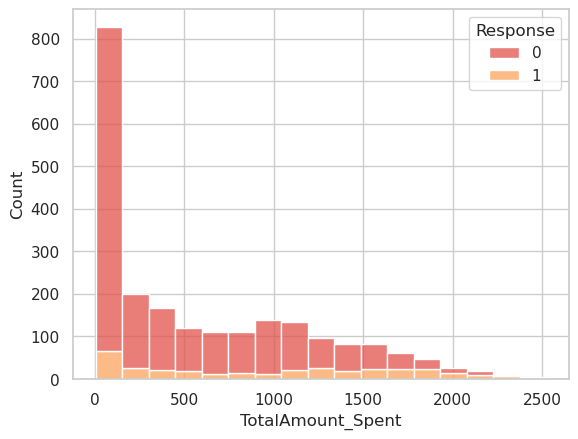

In [52]:
sns.histplot(data=df, kde=False, x='TotalAmount_Spent', hue='Response', multiple='stack')

# Jika customer sudah nge-spent moneynya di sekitaran 1000-2000 dollar maka customer ini cenderung menerima penawaran campaign

Bisa kita lihat,ini cukup reskiut,baik response 0 dan response 1,mereka distribusinya cukup mirip.

Tapi jika kita perhatikan secara detail,ketika total amount spent nya itu menyentuh angka 1000,itu terjadi peningkatan customer yang menerima penawaran campaign kita.

Tapi untuk response sama dengan 0 itu terjadi peningkatan juga,namun menurun lagi,tapi untuk response sama dengan 1,distribusi nya itu berbeda.

Jadi disini ada pola unik,atau bisa di katakan,Jika customer sudah nge-spent moneynya di sekitaran 1000-2000 dollar maka customer ini cenderung menerima penawaran campaign.

## Purchases
Bisa kita lihat di data kita banyak sekali kolom-kolom purchases,maka kita akan melakukan hal sapa seperti pada kolom Mnt,yaitu mengeksplor atau menganalisa nya secara sekaligus.

Disini kita akan membuat list nya dulu menggunakan list comprahasion

In [53]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
purchase_feature.append('Response')

In [54]:
df[purchase_feature].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
NumCatalogPurchases,0.220894
NumWebPurchases,0.148453
NumStorePurchases,0.038855
NumDealsPurchases,0.001854


Bisa kita lihat disini,nilai palling tertinggi ada di kolom **NumCatalogPurchases**,dan disini nilainya sekitar 0,22 atau sekitar 20%,nilai ini tidak terlalu tinggi sama sekali.

Selain itu,kita bisa melakukan feature enginerring atau membuat kolom baru yaitu **TotalPurchases**

In [55]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df['Total_Purchases'] = df[purchase_feature].sum(axis=1)

Kita juga akan melihat histogram plot nya

<Axes: xlabel='Total_Purchases', ylabel='Count'>

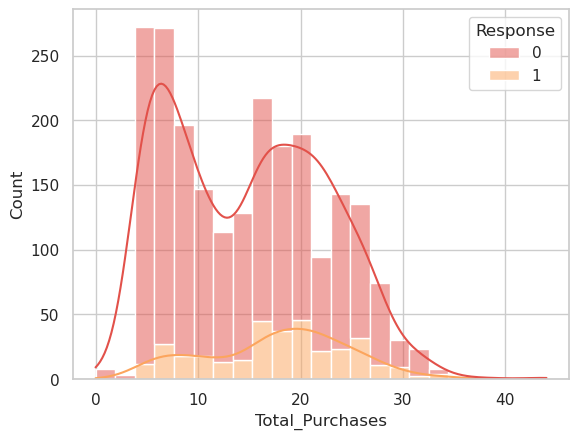

In [56]:
sns.histplot(data=df, kde=True, x='Total_Purchases', hue='Response', multiple='stack')

# Tidak ada pola unik, atau pemisah antara response 0 dan 1

Disini bisa kita lihat,untuk kolom purchases itu,distribusi baik dari response 0 dan response 1 itu tidak jauh berbeda.

Jadi,bisa di katakan tidak ada pola unik atau pemisah antara response 0 dan 1.

Pola unik disini maksudnya,adanya pola yang berbeda untuk masing-masing nilai response ini,karena ketika adanya pola unik ini,maka model Machine Learning kita itu pasti dapat mempelajari pola-pola yang berbeda ini,karena pada dasar nya ini polanya berbeda.

Maka dari itu sangat penting jika kita membandingkannya seperti ini.

Karena ini juga kolom numeric,maka langsung saja kita mencari korelasi nya

In [57]:
df[['NumWebVisitsMonth', 'Response']].corr()[['Response']]

# Tidak memiliki korelasi terhadap Response

,Response
NumWebVisitsMonth,-0.004449
Response,1.000000


Bisa kita lihat disini,korelasinya itu negatif sangat mendekati 0,artinya karena ini first in corelations,enterpretasi ketika hasil result nya itu mendekati 0,maka itu tidak memiliki korelasi apa-apa,atau random.

Jadi,untuk menentukan apakah customer kita ini akan menerima penawaran campaign terbaru kita,itu tidak ada hubungan nya dengan **NumWebVisitsMonth**

## Previous Campaign
Selanjutnya untuk kolom-kolom campaign seperti AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,dan lain lain,ini juga sama seperti kolom-kolom purchases,kita dapat menganalisis nya secara sekaligus.

Karena kolom-kolom ini kan status campaign sebalumnya,jadi ketika nilainya 0,berarti customer ini tidak menerima penawan campaign nya.

Kita akan melakukan hal yang sama,kita kumpulkan dulu seluruh variabel di dalam satu list.

In [58]:
prev_cmp = [c for c in df.columns if 'AcceptedCmp' in str(c)]
prev_cmp.append('Response')

In [59]:
df[prev_cmp].corr()[['Response']].sort_values(by='Response', ascending=False)

,Response
Response,1.000000
AcceptedCmp5,0.328182
AcceptedCmp1,0.293882
AcceptedCmp3,0.254144
AcceptedCmp4,0.176890
AcceptedCmp2,0.169249


Bisa kita lihat disini,lumayan tinggi yaitu 30% untuk campaign ke 5 ini,tapi itu masih jauh di bawah 60%.

## Complain
untuk kolom ini kita hanya akan melakukan korelasi saja seperti biasa.

In [60]:
df[['Complain', 'Response']].corr()[['Response']]

# Tidak memiliki korelasi terhadap Response

,Response
Complain,0.000185
Response,1.000000


Disini sama seperti dengan kolom **NumWebVisitsMonth**,disini tidak memiliki korelasi sama sekali,karena hasilnya mendekati 0.

## Country
Karena kolom ini adalah kolom kategori,maka kita dapat menggunakan metode seperti ini,kita akan melihat persentase nya.

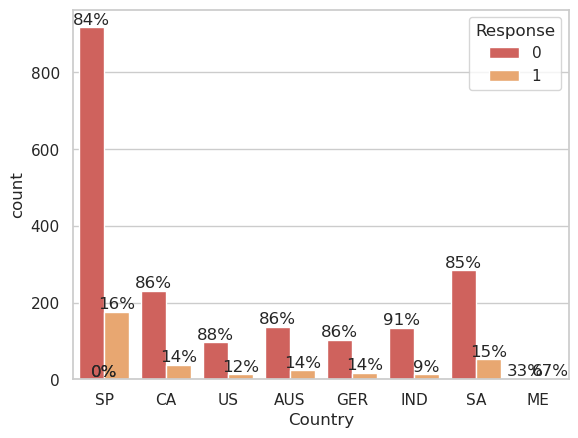

In [61]:
ax = sns.countplot(x='Country', hue='Response', data=df)
barPerc(df, 'Country', ax)

## Mexico dan Spain adalah negara yang paling cenderung menerima penawaran campaign terbaru

Bisa kita lihat,untuk ME atau meksiko itu 67% yang paling tertinggi dari yang lain.

Bisa di katakan,customer dari meksiko itu sangat-sangat cenderung akan menerima campaign kita.

# Modelling
Tahapan awal untuk melakukan modelling,kita akan melakukan spliting atau data spliting terlebih dahulu.

## Data Splitting
Data splitting itu apa sih? penjelasnnya seperti ini:

Dari dataset yang kita punya,kita akan membagi nya menjadi beberapa bagian.

Tujuan dari membagi dataset yang kita punya ini menjadi beberapa bagian,sebenarnya hanya untuk mengevaluasi performa model yang akan kita buat.

Biasanya,kalau kita ingin membuat suatu mesin yang pastinya tentu harus di uji performa dari mesin ini,kalau misalnya performa nya saat di uji itu bagus,maka nanti  saat di pakai oleh end user nanti,itu pasti sesuai yang di harapkan.

Berapa bagian yang akan kita bagi ketika kita melakukan data splitting?

Disini kita akan membaginya menjadi 3 bagian:


- Data Train = 60%
- Data Validation = 20%
- Data Test = 20%

masing-masing dari ketiga dataset ini fungsinya apa?Pasti kalian  bertanya-tanya kan.

Untuk **Data Train** sendiri,karena disini kita ingin membuat suatu mesin,yaitu machine learning,mesin yang dapat mempelajari sesuatu,maka mesin atau model yang akan kita buat ini akan mempelajari di bagian data train,jadi modelling kita akan mempelajari data-data,pola-pola yang ada di data dtain.

Selanjutnya untuk **Data Validation**,itu sebenarnya untuk mengevaluasi performa dari modeling kita yang sudah di latih di Data Train.

Sedangkan untuk **Data Test**,Sebenarnya itu sama seperti Data Validation,tapi di test lagi untuk kedua kali nya,jadi kalau misalnya di Data Validation itu kita masih mendapatkan hasil performa yang kurang bagus,mak kita perlul mengubah sesuatu di Data Train,sampai kita merasa puas.

Ketika sudah mendapatkan hasil evaluasi dari Data Validation itu yang bagus,maka kita harus menguji nya lagi di Data Test,jadi seperti lapisan kedua supaya bener-benar akurat,karena kan ini di uji di data-data yang berbeda.

jadi misalkan hasil dari Data Validation itu bagus,tapi hasil dari evaluasi di Data Test itu jelek,ini pasti ada yang aneh kan,pasti ada sesuatu yang salah,tapi kalaiu misalkan hasil Data Validation itu hasilnya kurang lebih  sama performanya,maka bisa di bilang model yang kita buat itu sudah bagus.

Pertanyaan selanjutnya,berapa dataset yang akan kita bagi??

Untuk Data Train,kita akan mengambil 60% dari total keseluruhan data,sedangkan untuk Data Validation 20%,dan untuk Data Test juga 20%.

Disini kita akan mulai dari awal lagi

In [62]:
df = pd.read_csv('marketing_data.csv')
df.shape

(2240, 28)

Disini kita punya 2240 data,dan untun membagi 2240 ini menjadi tiga bagian,kita akan menggunakan library **scikit-learn**,dan disini kita akan mengimport fungsi ```train_test_split``` dari  ```sklearn.model_selection``` library.

Fungsi ```train_test_split``` ini sendiri ada banyak,bisa di cek di dokumentasi biar lebih jelas.Membaca dokumntasi itu termasuk kebiasaan yang bagus,jadi misalkan kita bingun,kita bisa membaca di dokumentasi nya.

In [63]:
from sklearn.model_selection import train_test_split

Disini kita hanya akan memakai 3 parameter saja,yang pertama kita akan memasukkan data yang akan kita bagi,yaitu ```df```,lalu berapa ukuran yang akan kita bagi,disini kita akan bagi 20% untuk Data Test,dan kita juga harus menambahkan ```random_state```,karena jika kita tidak menggunakan ```random_state```,maka pembagian nya itu akan sangat random.

Jadi ketika atur ```random_state``` nya itu 1,setiap kali kita menjalankan fungsi ini,kita akan mendapatkan data yang itu-itu saja,atau tidak akan berubah data nya.

In [64]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

Jadi fungsi ```train_test_split``` itu sendiri adalah me return dua variabel.Jadi disini fungsi ```train_test_split``` itu akan di bagi menjadi dua yaitu,```df_full_train```,dan ```df_test```.


Disini kita juga punya Data Validation,jadi kita harus membagi nya lagi.

In [65]:
df_train, df_valid = train_test_split(df_full_train, test_size=0.25, random_state=1)

Untuk memastikan kita benar-benar mendapatkan pembagian data nya,kita bisa cek dengan cara seperti ini:

In [66]:
df_train.shape, df_valid.shape, df_test.shape

((1344, 28), (448, 28), (448, 28))

Selanjutnya kita langsung saja bagi dengan total dari keseluruhan data yang kita punya

In [67]:
1344/2240, 448/2240, 448/2240

(0.6, 0.2, 0.2)

Sebenarnya ada salah satu yang yang perlu di gari bawahi untuk Data Splitting,karena Data Splitting ini sangat-sangat krusial,kalaqu misalmya kita salah melakukan Data Splitting,itu akibatnya sangat fatal dan sangat menipu.

Jadi misalnya hasil dari Data Validation,dan hasil dari performa dari Data Test itu bagus,tapi ketika user menggunakan nya di dalam dunia nyata,atau di dalam keadaan saat sudah di terapkan di website atau dimana pun,dan hasil yang di dapatkan ternyata tidak sama,ini pasti ada kesalahan di bagian Data Splitting nya.

Maka dari itu memang Data Splitting  ini memang harus di perhatikan,dan teknik untuk Data Spliting itu sebenarnya tidak hanya train test split saja,sebenarnya banyak teknik nya,seperti cross validation,dan lain-lain.

Tapi yang umum di pakai itu adalah Data Train,Data Validation,dan Data Test.

Banyak juga petanyaan seperti,apakah kita melakukan Data Processing dulu baru Data Splitting?,atau Data Splitting dulu baru Data Processing?

Karena disini kita sudah melakukan banyak Processing Data seperti mengisi missing values,feature engineering,dan juga lain-lain,tapi sebenarnya di dalam dunia data,hal yang harus kita lakukan adalah,kita melakukan splitting dulu baru melakukan Data Processing.

Karena kalu kita melakukan Data Procesing dulu baru Data Splitting,itu akan terjadi Data Leakage atau kebocoran data.

In [68]:
# Data Processing dulu --> Baru Data Splitting? --> akan terjadi data leakage/kebocoran data
# Data Splitting dulu --> Baru Data Processing?

# Preprocessing
Preprocessing ini kita akan melakukan proprocessing yang sama seperti yang sudah kita lakukan sebelumnya,namun kita akan melakukan proprocessing itu ke tiga data yang sudah kita bagi yaitu:
- df_train
- df_valid
- df_test


## Numeric Preprocessing

### 1.Menghapus spasi yang ada di awal atau akhir dari nama kolom

In [69]:
df_train.columns = df_train.columns.str.replace(' ', '')
df_valid.columns = df_valid.columns.str.replace(' ', '')
df_test.columns = df_test.columns.str.replace(' ', '')

### 2.Menghapus dolar sign dan koma,karena kita akan mengubah ini menjadi float.

In [70]:
df_train['Income'] = df_train['Income'].str.replace('$', '')
df_train['Income'] = df_train['Income'].str.replace(',', '')
df_train['Income'] = df_train['Income'].astype('float')

df_valid['Income'] = df_valid['Income'].str.replace('$', '')
df_valid['Income'] = df_valid['Income'].str.replace(',', '')
df_valid['Income'] = df_valid['Income'].astype('float')

df_test['Income'] = df_test['Income'].str.replace('$', '')
df_test['Income'] = df_test['Income'].str.replace(',', '')
df_test['Income'] = df_test['Income'].astype('float')

### 3.Mengubah datatype Dt_Customers menjadi Datatime

In [71]:
df_train['Dt_Customer'] = pd.to_datetime(df_train['Dt_Customer'])

df_valid['Dt_Customer'] = pd.to_datetime(df_valid['Dt_Customer'])

df_test['Dt_Customer'] = pd.to_datetime(df_test['Dt_Customer'])

### 4.Mengisi Mising Values Income dengan Median

In [72]:
df_train['Income'] = df_train['Income'].fillna(df_train['Income'].median())
df_valid['Income'] = df_valid['Income'].fillna(df_valid['Income'].median())
df_test['Income'] = df_test['Income'].fillna(df_test['Income'].median())

### Memfilter Customer yang lahir di atas 1900

In [73]:
df_train = df_train[df_train['Year_Birth'] > 1900].reset_index(drop=True)
df_valid = df_valid[df_valid['Year_Birth'] > 1900].reset_index(drop=True)
df_test = df_test[df_test['Year_Birth'] > 1900].reset_index(drop=True)

### 5.Membuat kolom baru untuk Customer_Age

In [74]:
df_train['Customer_Age']  = df_train['Dt_Customer'].dt.year - df_train['Year_Birth']
df_valid['Customer_Age']  = df_valid['Dt_Customer'].dt.year - df_valid['Year_Birth']
df_test['Customer_Age']  = df_test['Dt_Customer'].dt.year - df_test['Year_Birth']

### 6.Mengubah beberapa value menjadi single

In [75]:
df_train['Marital_Status'] = df_train['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_valid['Marital_Status'] = df_valid['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))
df_test['Marital_Status'] = df_test['Marital_Status'].apply(lambda x: 'Single' if str(x) in ['YOLO', 'Alone' , 'Absurd'] else str(x))

### 7.Membuat kolom baru yaitu Num_Dependants

In [76]:
df_train['Num_Dependants'] = df_train['Kidhome'] + df_train['Teenhome']
df_valid['Num_Dependants'] = df_valid['Kidhome'] + df_valid['Teenhome']
df_test['Num_Dependants'] = df_test['Kidhome'] + df_test['Teenhome']

### 8.Membuat kolom baru yaitu Dt_Customer_Month & Dt_Customer_Year

In [77]:
df_train['Dt_Customer_Month'] = df_train['Dt_Customer'].dt.month
df_train['Dt_Customer_Year'] = df_train['Dt_Customer'].dt.year

df_valid['Dt_Customer_Month'] = df_valid['Dt_Customer'].dt.month
df_valid['Dt_Customer_Year'] = df_valid['Dt_Customer'].dt.year

df_test['Dt_Customer_Month'] = df_test['Dt_Customer'].dt.month
df_test['Dt_Customer_Year'] = df_test['Dt_Customer'].dt.year

### 9.Memmbuat kolom baru yaitu TotalAmount_Spent

In [78]:
amt_spent_features = [ c for c in df.columns if 'Mnt' in str(c)]
df_train['TotalAmount_Spent'] = df_train[amt_spent_features].sum(axis=1)
df_valid['TotalAmount_Spent'] = df_valid[amt_spent_features].sum(axis=1)
df_test['TotalAmount_Spent'] = df_test[amt_spent_features].sum(axis=1)

### 10.Membuat kolom baru yaitu Total_Purchases

In [79]:
purchase_feature = [c for c in df.columns if 'Purchase' in str(c)]
df_train['Total_Purchases'] = df_train[purchase_feature].sum(axis=1)
df_valid['Total_Purchases'] = df_valid[purchase_feature].sum(axis=1)
df_test['Total_Purchases'] = df_test[purchase_feature].sum(axis=1)

### Display untuk setiap masing-masing dataset yang sudah kita proprocessing

In [80]:
display(df_train.head())
print()
display(df_valid.head())
print()
display(df_test.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,7143,1955,2n Cycle,Together,74805.0,0,1,2013-11-06,14,209,162,209,41,162,37,5,4,7,10,2,0,0,0,0,0,0,0,SP,58,1,11,2013,820,26
1,6383,1971,PhD,Together,32892.0,1,0,2014-05-25,78,26,0,15,2,1,2,2,3,0,3,8,0,0,0,0,0,0,0,SA,43,1,5,2014,46,8
2,2853,1980,Graduation,Single,51766.0,1,0,2014-03-11,74,60,51,87,6,20,51,2,4,2,4,5,0,0,0,0,0,0,0,CA,34,1,3,2014,275,12
3,5393,1977,Graduation,Single,23763.0,1,0,2012-08-07,64,22,0,6,6,2,6,1,1,0,3,7,0,0,0,0,0,0,0,SP,35,1,8,2012,42,5
4,1340,1986,Graduation,Married,92910.0,0,0,2014-04-24,42,551,137,792,179,103,33,1,6,7,13,1,0,1,1,1,0,0,0,SP,28,0,4,2014,1795,27


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,9204,1970,Graduation,Widow,66731.0,0,1,2012-09-12,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,SP,42,1,9,2012,1029,17
1,1459,1966,PhD,Married,69063.0,0,1,2012-11-07,16,666,35,124,69,8,26,1,5,3,5,3,0,0,0,0,0,0,0,SP,46,1,11,2012,928,14
2,4971,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,1,28,13,1,4,2,3,1,4,8,0,0,0,0,0,0,0,SA,50,1,12,2012,155,10
3,3635,1962,PhD,Single,52597.0,0,1,2014-05-07,69,492,0,37,7,0,42,3,6,3,8,5,0,0,0,0,0,0,0,SA,52,1,5,2014,578,20
4,4769,1977,Master,Together,57954.0,1,1,2014-06-18,52,456,4,24,0,0,9,7,8,2,6,7,0,1,0,0,0,0,0,SP,37,2,6,2014,493,23


Disini ada beberapa proprocessing yang belum kita lakukan,yaitu Education,Marital Status,karena ini adalah kategori kolom atau features kategori

Selanjutnya kita akan memfilter,untuk mengambil kolom-kolom yang penting saja untuk di jadikan modeling.

In [81]:
cmp_feat = [c for c in df.columns if 'AcceptedCmp' in str(c)]
mnt_feat = [c for c in df.columns if 'Mnt' in str(c)]
num_feat = [c for c in df.columns if 'Num' in str(c)]

In [82]:
numeric_feat = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain', 'Customer_Age',
                'Num_Dependants', 'Dt_Customer_Month', 'Dt_Customer_Year', 
                'TotalAmount_Spent', 'Total_Purchases']

In [83]:
all_numeric_feat = cmp_feat + mnt_feat + num_feat + numeric_feat

In [84]:
display(df_train[all_numeric_feat].head(2))
display(df_valid[all_numeric_feat].head(2))
display(df_test[all_numeric_feat].head(2))

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,209,162,209,41,162,37,5,4,7,10,2,74805.0,0,1,14,0,58,1,11,2013,820,26
1,0,0,0,0,0,26,0,15,2,1,2,2,3,0,3,8,32892.0,1,0,78,0,43,1,5,2014,46,8


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,0,0,0,0,0,371,159,194,58,106,141,4,4,3,6,3,66731.0,0,1,33,0,42,1,9,2012,1029,17
1,0,0,0,0,0,666,35,124,69,8,26,1,5,3,5,3,69063.0,0,1,16,0,46,1,11,2012,928,14


## Categoric Preprocessing
Langkah awal yang akan kita lakukan yaitu kita harus mengetahui features-features mana yang merupakan variabel kategori.

In [85]:
df_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,3194,1974,PhD,Single,71466.0,0,0,2014-04-05,86,412,12,546,78,182,0,1,4,4,10,1,0,0,0,0,0,0,0,CA,40,0,4,2014,1230,19
1,3599,1970,Graduation,Married,63684.0,0,1,2012-11-26,61,575,80,428,208,93,80,3,8,4,8,5,0,0,0,0,0,0,0,SP,42,1,11,2012,1464,23
2,5300,1973,Master,Married,38961.0,1,0,2013-12-30,60,19,7,19,0,1,24,1,2,1,2,7,0,0,0,0,0,0,0,SP,40,1,12,2013,70,6
3,7022,1971,Graduation,Married,76445.0,1,0,2012-09-28,2,739,107,309,140,80,35,1,2,5,13,6,0,0,0,0,0,0,0,SA,41,1,9,2012,1410,21
4,1726,1970,Graduation,Single,22585.0,0,0,2013-03-18,23,3,9,15,13,2,39,1,1,1,2,9,1,0,0,0,0,1,0,SP,43,0,3,2013,81,5


Disini bisa kita lihat untuk features kategori adalah Education,Marital_status,dan juga Country,dimana bentuk mereka masih dalam bentuk string,dan ini merupakan variabel categoric.

Ketiga features ini merupakan variabel categoric yang perlu kita ubah,dan perlu kita proses menjadi angka agar nanti machine learnig model kita dapat memproses nya.

Disini kita buat saja,kita samakan namanya menjadi ```categoric_feat```,karena ini merupakan categori feat.

In [86]:
categoric_feat = ['Education', 'Marital_Status', 'Country']

Disini karena kita sudah memnpunyar catergri features dan juga numeric features,maka kita gabungkan saja menjadi satu ke dalam variabel ```all_feat```.

In [87]:
all_feat = categoric_feat + all_numeric_feat

Selanjutnya disini,kita langsung filter saja.

Disini kita hanya akan mengambil features-features yang penting saja,yang kita akan masukkan ke dalam model nya yang sudah kita processing,dan untuk features seperti ID,itu kita tidak membutuhkannya.

In [88]:
df_train_final = df_train[all_feat]
df_valid_final = df_valid[all_feat]
df_test_final = df_test[all_feat]

Disini perlu kita pahami juga,dalam kategori features itu ada beberapa jenis,disini kategori features kita ada tiga,yaitu:

Categoric:
- Education (ordinal)
- Marital_Status (nominal)
- Country (nominal)

Untuk features Education,itu masuk ke dalam ordinal,dan untuk features Marital_Status dan Country itu termasuk kedalam nominal,nominal features ini hanya label saja,apakah customer kita sudah menikah?,single?,dan untuk country ini kependekannya apa,misalkan untuk SP itu negara apa,itu hanya pe labelan saja yang tidak ada tingkatan tertentu antara nilai-nilai dengan nilai lainnya.

Tapi lain hal dengan features Education,Education ini namanya ordinal,karena disini bisa kita lihat graduation nya Phd,tentunya Phd itu pasti lebih tinggi tingkatan nya dari pada Master.Maka dari itu,ini masuk ke dalam kategori ordinal,Jadi ini ada tingkatan nya

Jika kita ingin melihat lebih dalam lagi,kita bisa melakukan:

In [89]:
df_train.Education.unique()

array(['PhD', 'Graduation', 'Master', '2n Cycle', 'Basic'], dtype=object)

Disini bisa kita lihat ada beberapa nilai,disini Basic sudah pasti paling pertama,tapi untuk 2n Cycle ini apa,kita belum tau,kita anggap saja ini yang ke 3 urutannya,yang ke 2 itu Graduation,yang ke 4 itu Master,yang ke 5 itu Phd,kurang lebih tingkatannya seperti itu.

Maka dari itu,kita akan merubah nilai ini menjadi urutan yang benar dimana urutannya:

 1. Basic
  2. Graduation
  3. 2n Cycle
  4. Master
  5. PhD

Maka dari itu,untuk memproses seperti itu,kita pelu membuat dictionary.

In [90]:
education = {'Basic':1 , 'Graduation':2, '2n Cycle':3, 'Master':4 , 'PhD':5}

Disini kita aman mapping dengan menggunakan function ```map```,yang ada di pandas,untuk mempermudah kan kita.

In [91]:
df_train_final['Education'] = df_train_final['Education'].map(education)
df_valid_final['Education'] = df_valid_final['Education'].map(education)
df_test_final['Education'] = df_test_final['Education'].map(education)

Dan kita coba lihat dengan function ```head```

In [92]:
df_train_final.head()

,Education,Marital_Status,Country,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Income,Kidhome,Teenhome,Recency,Complain,Customer_Age,Num_Dependants,Dt_Customer_Month,Dt_Customer_Year,TotalAmount_Spent,Total_Purchases
0,5,Single,CA,0,0,0,0,0,412,12,546,78,182,0,1,4,4,10,1,71466.0,0,0,86,0,40,0,4,2014,1230,19
1,2,Married,SP,0,0,0,0,0,575,80,428,208,93,80,3,8,4,8,5,63684.0,0,1,61,0,42,1,11,2012,1464,23
2,4,Married,SP,0,0,0,0,0,19,7,19,0,1,24,1,2,1,2,7,38961.0,1,0,60,0,40,1,12,2013,70,6
3,2,Married,SA,0,0,0,0,0,739,107,309,140,80,35,1,2,5,13,6,76445.0,1,0,2,0,41,1,9,2012,1410,21
4,2,Single,SP,1,0,0,0,0,3,9,15,13,2,39,1,1,1,2,9,22585.0,0,0,23,0,43,0,3,2013,81,5


Bisa kita lihat disini untuk features Education sudah berubah menjadi angka,dimana 5 itu untuk PhD,2 itu untuk Graduation,dan 4 itu untuk Master.

Tapi,untuk mengubah Marital_Status,dan Country menjadi number,kita tidak bisa menggunakan metode seperti ini,karena ini adalah hanya untuk tingkatan,jadi kalau kita mengubah Single,Married menjadi 2,artinya machine learning model kita itu akan mendeteksi bahwa married itu lebih tinggi di bandingkan single,tapi pada kenyataannya ini kan features nya nominal,jadi ga ada tingkatan seperti itu.

Maka dari itu,kita perlu teknik khusus,kita akan menggunakan teknik baru agar features Marital_Status dan Country kita agar dapat terdeteksi di model machine learning kita,nama teknik nya adalah **one hot encoding**

Jadi disini bisa kita contohkan seperti ini:

![Contoh OneHotEncoding](OneHotEncoding.png)


Disini bisa kita lihat,ada kolom Color,dan ada Red,Red,Yellow,Green,dan Yellow,kolom-kolom ini jika di lakukan one hot encoding,itu akan berubah menjadi gambar sebelah nya.

Dia akan menciptakan 3 kolom baru karena cuma ada tiga uniq values disini,yaitu Red,Yellow,dan Green,jadi disini akan tercipta 3 kolom baru yaitu Red,Yellow,dan Green.

Dimana di baris pertama karena yang paris petama disini Red,maka Red ini jadi 1,Yellow itu 0,dan Green itu 0,di baris kedua itu Red,maka nanti di baris kedua nya itu Red juga sama dengan 1,Yellow itu 0 dan Green nya 0,Sedangkan baris ke 3 itu Yellow,jadi Red nya 0,Yellow nya 1 ,dan Green nya 0,dan seterusnya.

Nanti machine learning model kita tau bahwa model ini untuk yang baris pertama itu adalah Red,karena Yellow dan Green nya 0,jadi machine learning model kita tahu.

Sedangkan untuk baris ketiga,Yellow itu 1,jadi dia tau kalau baris ke 3 ini,itu adalah Yellow,bukan Red dan Green karena nilai nya 0.

Sebenarnya cara ini bisa di lakukan manual,cuman di scikit-learn itu sudah ada banyak pacjage yang tersedia,disini package yang akan kita pakai dari scikit-learn,dan library yang akan kita gunakan itu adalah ```from sklearn.feature_extraction import DictVectorizer```

In [93]:
from sklearn.feature_extraction import DictVectorizer

Pertama-tama untuk menggunakan ```DictVectorizer``` ini kita perlu mendefinisikan ```DictVectorizer`` nya terlebih dahulu.

In [94]:
dv = DictVectorizer(sparse=False)

Untuk menggunkan ini,kita perlu mengubah DataFrame kita itu menjadi dictionary,karena ini mainnya di dalam level dictionary bukan DataFrame.

Cara mengubah nya yaitu dengan seperti ini:

In [95]:
df_train_final_dicts = df_train_final.to_dict(orient='records')
df_valid_final_dicts = df_valid_final.to_dict(orient='records')
df_test_final_dicts = df_test_final.to_dict(orient='records')

Disini kita akan melihat hasilnya,kita akan ambil 2 row teratas dari ```df_train_final_dicts```

In [96]:
df_train_final_dicts[0:2]

[{'Education': 5,
  'Marital_Status': 'Single',
  'Country': 'CA',
  'AcceptedCmp3': 0,
  'AcceptedCmp4': 0,
  'AcceptedCmp5': 0,
  'AcceptedCmp1': 0,
  'AcceptedCmp2': 0,
  'MntWines': 412,
  'MntFruits': 12,
  'MntMeatProducts': 546,
  'MntFishProducts': 78,
  'MntSweetProducts': 182,
  'MntGoldProds': 0,
  'NumDealsPurchases': 1,
  'NumWebPurchases': 4,
  'NumCatalogPurchases': 4,
  'NumStorePurchases': 10,
  'NumWebVisitsMonth': 1,
  'Income': 71466.0,
  'Kidhome': 0,
  'Teenhome': 0,
  'Recency': 86,
  'Complain': 0,
  'Customer_Age': 40,
  'Num_Dependants': 0,
  'Dt_Customer_Month': 4,
  'Dt_Customer_Year': 2014,
  'TotalAmount_Spent': 1230,
  'Total_Purchases': 19},
 {'Education': 2,
  'Marital_Status': 'Married',
  'Country': 'SP',
  'AcceptedCmp3': 0,
  'AcceptedCmp4': 0,
  'AcceptedCmp5': 0,
  'AcceptedCmp1': 0,
  'AcceptedCmp2': 0,
  'MntWines': 575,
  'MntFruits': 80,
  'MntMeatProducts': 428,
  'MntFishProducts': 208,
  'MntSweetProducts': 93,
  'MntGoldProds': 80,
  'NumD

Bisa kita lihat disini ada seperti ini

```
'Education': 5,
  'Marital_Status': 'Single',
  'Country': 'CA',
  'AcceptedCmp3': 0,
  'AcceptedCmp4': 0,
  'AcceptedCmp5': 0,
  'AcceptedCmp1': 0,
  'AcceptedCmp2': 0,
  'MntWines': 412,
  'MntFruits': 12,
  'MntMeatProducts': 546,
  'MntFishProducts': 78,
  'MntSweetProducts': 182,
  'MntGoldProds': 0,
  'NumDealsPurchases': 1,
  'NumWebPurchases': 4,
  'NumCatalogPurchases': 4,
  'NumStorePurchases': 10,
  'NumWebVisitsMonth': 1,
  'Income': 71466.0,
  'Kidhome': 0,
  'Teenhome': 0,
  'Recency': 86,
  'Complain': 0,
  'Customer_Age': 40,
  'Num_Dependants': 0,
  'Dt_Customer_Month': 4,
  'Dt_Customer_Year': 2014,
  'TotalAmount_Spent': 1230,
  'Total_Purchases': 19},
```

ini adalah row pertama.

Selanjutnya kita tinggla melakukan transform,untuk mengubah data berupa list of dictionary (df_train_final_dicts) menjadi numerical feature matrix (array 2D), menggunakan DictVectorizer (dv).

In [97]:
df_train_final_dicts = dv.fit_transform(df_train_final_dicts)
df_valid_final_dicts = dv.transform(df_valid_final_dicts)
df_test_final_dicts = dv.transform(df_test_final_dicts)

Jika kita ingin melihat hasilnya,kita bisa menjalankan:

In [98]:
df_train_final_dicts

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.230e+03,
        1.900e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.464e+03,
        2.300e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 7.000e+01,
        6.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 4.400e+01,
        1.000e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.241e+03,
        2.100e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.100e+01,
        4.000e+00]])

Hasil ini berupa array 2D, di mana setiap baris adalah satu vektor fitur yang merepresentasikan satu data (baris dari dataset asli). Contohnya:

```
[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.230e+03,
        1.900e+01],
```

Angka-angka ini adalah hasil konversi dari data kategorikal dan numerik oleh DictVectorizer, siap digunakan untuk model machine learning.

Disini kalian pasti bingung,bagaimana caranya kita ingin membalikan dari bentuk vektor ini menjadi DataFrame,karena kita ingin melihat hasil nya sebenarnya seperti apa sih.

Caranya kita akan melakukan seperti ini:

In [99]:
df_train_final = pd.DataFrame(df_train_final_dicts, columns = dv.get_feature_names_out())
df_valid_final = pd.DataFrame(df_valid_final_dicts, columns = dv.get_feature_names_out())
df_test_final = pd.DataFrame(df_test_final_dicts, columns = dv.get_feature_names_out())

Untuk melihat hasilnya,kita bisa jalankan:

In [100]:
dv.get_feature_names_out()

array(['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Complain', 'Country=AUS', 'Country=CA',
       'Country=GER', 'Country=IND', 'Country=ME', 'Country=SA',
       'Country=SP', 'Country=US', 'Customer_Age', 'Dt_Customer_Month',
       'Dt_Customer_Year', 'Education', 'Income', 'Kidhome',
       'Marital_Status=Divorced', 'Marital_Status=Married',
       'Marital_Status=Single', 'Marital_Status=Together',
       'Marital_Status=Widow', 'MntFishProducts', 'MntFruits',
       'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines',
       'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases',
       'NumWebPurchases', 'NumWebVisitsMonth', 'Num_Dependants',
       'Recency', 'Teenhome', 'TotalAmount_Spent', 'Total_Purchases'],
      dtype=object)

Ini akan me return nama-nama kolom nya berdasarkan urutannya.

jadi di dalam kolom ini
```
[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.230e+03,
        1.900e+01]
```

Dimana untuk kolom pertama ini,```0.000e+00``` ini adalah ```AcceptedCmp1```,untuk kolom kedua,```0.000e+00``` ini adalah ```AcceptedCmp2```,dan seterusnya.

Coba kita lihat dengan function ```head```

In [101]:
df_train_final.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country=AUS,Country=CA,Country=GER,Country=IND,Country=ME,Country=SA,Country=SP,Country=US,Customer_Age,Dt_Customer_Month,Dt_Customer_Year,Education,Income,Kidhome,Marital_Status=Divorced,Marital_Status=Married,Marital_Status=Single,Marital_Status=Together,Marital_Status=Widow,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Num_Dependants,Recency,Teenhome,TotalAmount_Spent,Total_Purchases
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,4.0,2014.0,5.0,71466.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0,12.0,0.0,546.0,182.0,412.0,4.0,1.0,10.0,4.0,1.0,0.0,86.0,0.0,1230.0,19.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,42.0,11.0,2012.0,2.0,63684.0,0.0,0.0,1.0,0.0,0.0,0.0,208.0,80.0,80.0,428.0,93.0,575.0,4.0,3.0,8.0,8.0,5.0,1.0,61.0,1.0,1464.0,23.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,40.0,12.0,2013.0,4.0,38961.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,24.0,19.0,1.0,19.0,1.0,1.0,2.0,2.0,7.0,1.0,60.0,0.0,70.0,6.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41.0,9.0,2012.0,2.0,76445.0,1.0,0.0,1.0,0.0,0.0,0.0,140.0,107.0,35.0,309.0,80.0,739.0,5.0,1.0,13.0,2.0,6.0,1.0,2.0,0.0,1410.0,21.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,43.0,3.0,2013.0,2.0,22585.0,0.0,0.0,0.0,1.0,0.0,0.0,13.0,9.0,39.0,15.0,2.0,3.0,1.0,1.0,2.0,1.0,9.0,0.0,23.0,0.0,81.0,5.0


Disini bisa kita lihat ada kolom Country=AUS,Country=CA,dan lainnya,untuk customer yang baris pertama itu kan Country=CA,atau sama dengan 1,maka otomatis ini Country nya itu pasti CA,Kalau misalnya Marital_Status nya single disini maka nilai nya 1,karena untuk yang lainnya 0.Jadi di baris pertama ini custemer itu adalah single,machine learning kita akan memahami baris pertama itu customer adalah single,dan itu juga berlaku untuk yang lainnya.

# Modelling
Karena kita sudah melakukkan step-step yang di perlukan untuk menyiapkan dataset kita,kita bisa masuk ke dalam Modelling.

Dalam dunia pemodelan,kita perlu memerlukan dua variabel,variabel itu adalah variabel **x**,yang merupakan independent variabel,dan juga variabel **y**,yang merupakan dependent variabel,atau biasa nya di sebut dengan target variabel kita.

- X = independent variable
- y = dependent variable (target variable) --> response 

Dalam kasus ini,target variabel kita itu adalah **Response**.

Dimana 0 adalah tidak menerima penawaran campaign,dan 1 itu menerima penawaran campaign.

Disini kita perlu mendefinisikan variabel **x** nya itu apa saja,variabel **x** nya itu adalah ```all_feat```,semua features yang kita sudah preprocessing,seperti Education,Marital_Status,Income,dan seterusnya.

Disini juga ada ```df_train_final```,itu juga merupakan variabel **x**,karena kita memfilter nya hanya mengambil features-features yang akan kita gunakan sebagai predictor,atau sebagai independent variabel kita ada juga ```df_valid_final```,dan juga ada ```df_test_final```.

Kita bisa langsung saja melakukan seperti ini:

In [102]:
X_train_final = df_train_final
X_valid_final = df_valid_final
X_test_final = df_test_final

Untuk Variabel **y** nya itu tetap  ada di ```df_train```,di situ masih tersompan variabel Response nya untuk target variabel kita.

In [103]:
y_train_final = df_train.Response
y_valid_final = df_valid.Response
y_test_final = df_test.Response

## Base Model
Dalam pemodelan kali ini,kita hanya akan mencoba dua model saja tidak terlalu banyak,yaitu:
- Logistic Regression
- Random Forest

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression

Selain dari pemodelan,kita pasti tahu kita ingin mengukur performa modeling kita,nah bagaimana nih cara menentukan atau mencari mattix apa,metode pengukuran apa untuk kasus kita ini.

Untuk binary classification itu biasanya kita menggunakan ```roc_auc```,jadi ini adalah matrix yang sering atau yang umum di gunakan untuk binary classification agar kita tahu apakah model kkita itu bagus atau tidak.

In [105]:
from sklearn.metrics import roc_auc_score

Dan kita langsung saja mendefinisikan model kita

In [106]:
model = LogisticRegression(random_state=42)

Dan setelah kita mendifinisikan model nya,kita langsung saja ```model.fit```,disini artinya modelnya itu sedang mempelajari dataset kita berdasarkan ```x_train_final```,dan juga ```y_train_final``` ini.

In [107]:
model.fit(X_train_final, y_train_final)

LogisticRegression(random_state=42)

Selanjutnya kita langsung memprediksi model nya.

In [108]:
model.predict_proba(X_valid_final)

array([[8.27630510e-01, 1.72369490e-01],
       [9.66990597e-01, 3.30094034e-02],
       [9.54474435e-01, 4.55255653e-02],
       [9.48230665e-01, 5.17693349e-02],
       [6.96221495e-01, 3.03778505e-01],
       [9.43435843e-01, 5.65641565e-02],
       [4.24335679e-01, 5.75664321e-01],
       [8.67125715e-01, 1.32874285e-01],
       [8.90960819e-01, 1.09039181e-01],
       [8.58647544e-01, 1.41352456e-01],
       [9.27882227e-01, 7.21177728e-02],
       [9.40123022e-01, 5.98769778e-02],
       [7.51246808e-01, 2.48753192e-01],
       [9.17619367e-01, 8.23806329e-02],
       [7.99307284e-01, 2.00692716e-01],
       [7.86560153e-01, 2.13439847e-01],
       [7.04308483e-01, 2.95691517e-01],
       [8.66728925e-01, 1.33271075e-01],
       [8.24195261e-01, 1.75804739e-01],
       [9.31262415e-01, 6.87375853e-02],
       [9.01895377e-01, 9.81046227e-02],
       [9.77393039e-01, 2.26069610e-02],
       [2.69395269e-01, 7.30604731e-01],
       [8.89593268e-01, 1.10406732e-01],
       [9.080588

Bisa kita lihat disini,ini akan menghasilkan 2 array,atau dua kolom bisa di bilang,dan ini ```8.27630510e``` adalah probabilitas untuk yang negatif atau yang 0,dan ini ```01, 1.72369490e-01``` adalah untuk probabilitas yang positif atau 1.

Kita akan mengambil yan positif atau 1.

In [109]:
model.predict_proba(X_valid_final)[:,1]

array([1.72369490e-01, 3.30094034e-02, 4.55255653e-02, 5.17693349e-02,
       3.03778505e-01, 5.65641565e-02, 5.75664321e-01, 1.32874285e-01,
       1.09039181e-01, 1.41352456e-01, 7.21177728e-02, 5.98769778e-02,
       2.48753192e-01, 8.23806329e-02, 2.00692716e-01, 2.13439847e-01,
       2.95691517e-01, 1.33271075e-01, 1.75804739e-01, 6.87375853e-02,
       9.81046227e-02, 2.26069610e-02, 7.30604731e-01, 1.10406732e-01,
       9.19411515e-02, 7.09367859e-02, 9.68731814e-02, 4.78066135e-01,
       5.79310359e-02, 1.15028245e-01, 3.23799163e-02, 1.89312856e-01,
       1.92254798e-02, 1.63817034e-01, 3.38197142e-01, 4.19316227e-02,
       1.48915301e-01, 6.79552329e-02, 8.43645596e-02, 3.95298579e-02,
       2.59772659e-02, 3.20373207e-02, 2.59909668e-01, 3.30137578e-02,
       1.09225015e-01, 3.67902904e-01, 2.77760227e-01, 7.02540566e-02,
       9.42854879e-02, 5.12971216e-02, 3.72387760e-02, 7.62549648e-02,
       2.05554136e-01, 7.55580453e-02, 2.29173557e-01, 5.08717887e-01,
      

Ini adalah probabilitas yang 1,jadi kalau misalnya ini probabilitas nya ```0,007```,berarti ini artinya customer ini cenderung akan menerima campaign kita.

Setelah kita mendapatkan valid prediction,kita juga bisa langsung saja melakukan tes terhadap performa model kita.

kita akan membadingkan seberapa akurat model kita.

In [110]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]

In [111]:
print('LogisticRegression ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

LogisticRegression ROCAUC Result: 0.747


Disini kita mendapatkan ```0,747```,ini sudah cukup bagus.

### RandomForest

In [112]:
from sklearn.ensemble import RandomForestClassifier

Kita akan melakukan hal sama yaitu mendefinisikan model terlebih dahulu.

In [113]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [114]:
y_valid_pred = model.predict_proba(X_valid_final)[:,1]
print('RandomForest ROCAUC Result:' , roc_auc_score(y_valid_final, y_valid_pred).round(3))

RandomForest ROCAUC Result: 0.885


Disini kita mendapatkan nilai ```roc_auc``` ```0.885```,ini lebih bagus dari sebelumnya.

Semakin tinggi nilai ```roc_auc```,itu artinya semakin bagus modeling kita.

Karena disini untuk RandomForest kita mendapatkan nilai paling tinggi,maka kita akan pilih RandomForest.

Base model itu bisanya tahapannya adalah,hyper meter parameter tuning,karena kita tidak akan melakukan tuning disini,karena ini bahasan berbeda.

Karena disini kita hanya ingin membuat suatu model sederhana saja dan mengetahui parameter-parameter mana yang sangat-sangat signifikan memberikan dampak bahwa parameter ini yang menyebabkan customer kita menerima campaign ini.

## Performance Stability Check
Selanjutnya,karena kita sudah memilih RandomForest,selanjutnya kita perlu melakukan performa stability check

Artinya,disini kita punya 3 dataset jika kalian ingat,ada train,valid,dan test,dimana di layer pertama kita mengukur akurasi model kita untuk RandomForest itu ```0.885```,tapi bagaimana jika kita melakukan testing,kita akan melakukan pengukuran evaluasi performa kita di dataset test,apakah memang sekitar ```0.885```,atau mungkin jauh turun menjadi ```0.800```,jika misalnya dia turun jauh,artinya ini tidak stabil model kita,jika kita melakukan prediksi ke dataset yang baru dengan distribusi data yang berbeda,performa model kita gak akan bisa akurat,gak bagus dan gak stabil,minimal itu sekitar ```0.887```,atau mungkin ```0.886```.

JIka kita mendapatkan hasil sekitaran itu,artinya model kita stabil terhadap data-data yang baru.

Disini kita perlu menggabungkan seluruh dataset kita.

In [115]:
X_full_train_final = pd.concat([X_train_final, X_valid_final])
y_full_train_final = pd.concat([y_train_final, y_valid_final])

Karena pada akhirnya kita akan menggunakan full dataset,karena ini harus di gabung karena semakin banyak data itu pasti harusnya semakin bagus model yang akan kita buat.

Selanjutnya kita akan melakukan hal yang sama yaitu mendifinisakn model dan juga melakukan ```model.fit```

In [116]:
model = RandomForestClassifier(random_state=42)
model.fit(X_full_train_final, y_full_train_final)

RandomForestClassifier(random_state=42)

Selanjutnya kita akan melakukan prediksi.

In [117]:
y_test_pred = model.predict_proba(X_test_final)[:,1]

print('RandomForest ROCAUC Result:' , roc_auc_score(y_test_final, y_test_pred).round(3))

RandomForest ROCAUC Result: 0.869


Disini kita mendapatkan nial ```roc_auc``` nya ```0.869```,ternyata model kita turun,tapi turunya tidak terlalu signifikan,jadi bisa dibilang model kita ini cukup stabil.

Jadi kita bisa menggunakan model ini untuk interpretasi,variabel mana sih yang cukup mempengaruhi penawaran campaign ini?

# Interpretation


Disini,karena kita sudah masuk ke dalam tahapan Conclusion,kita perlu mengingat kembali terkait goals yang kita punya,yaitu kita akan mengoptimasi campaign,campaign yang di berikan oleh tim marketing.

Campaign itu berkaitan dengan penjualan produk baru yang akan di jadwalkan di bulan depan,lalu bagimana kita mengoptimasi campaign tersebut?.

Salah satu cara nya adalah kita dapat membuat predictiv model,sehingga nanti kita akan mendapatkan profit yang maksimal.

Kenapa dengan membuat predictive model kita bisa mengoptimasi campaign?,itu akan kita jawab di bagian selanjutnya.

Selain itu juga,setelah kita membuat predictive model,kita akan bisa memahami karakteristik customer yang akan membeli prppduk baru tersebut.

Jadi predictive model yang akan kita buat,itu akan kita gunakan untuk memprediksi customer yang tidak masuk ke 2240 sample customer yang kita prediksi sebagai gunakan data latih dan juga data tes.

Jadi 2240 customer itu bukan seluruh data yang perusahaan itu punya,sehingga nanti ketika kita sudah melakukan predictive model ke data itu,dan kita juga sudah mengetahui customer mana saja yang berpotensi menerima campaign tersebut,tentunya kita dapat membuat target advestering campaign.

Jadi kita benar-benar fokus ke customer-customer yang berpotensi untuk menerima penawaran campaign tersebut dengan begitu saja kita sudah bisa meminimalkan cost,profit yang kita dapat juga maksimal karena kita benar-benar hanya membuat campaign yang orang-orang yang punya potensi besar akan menerima dan membeli produk baru tersebut.

Jadi nanti karena kita sudah membuat predictive model ini,langkah selanjutnya yang kita buat kita tinggal memprediksi data sisa nya dan kita akan memberikan list siapa saja customer-customer yang akan berpotensi menerima campaign tersebut dan membeli produk baru tersebut di bulan depan.

Tapi tentunya tim marketing mungkin tidak hanya ingin mempunyai list nya saja tapi juga dia ingin memahami karakteristik customer,sehingga nanti mungkin ketika tim marketing memahami karakteristik customer yang membeli produk baru atau menerima campaign tersebut,untuk membuat target advertising campaign nya itu akan menjadi lebih mudah.

Jadi sekarang kita akan memahami karakteristik customer yang ingin menerima campaign atau membeli produk baru tersebut.

Untuk memahami karakteristik customer salah satu caranya kita akan menggunakan **shap value**

Shap value ini di gunakan untuk meng explain model machine learning kita,jadi kita akan tahu,kita akan melkukan interpretasi kita akan menjelaskan hasil dari machine learning model kita ini.

In [119]:
import shap

In [124]:
# menghitung shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_final)

Selanjutnya kita akan melakukan plot 

Dan disini untuk shap values nya harus di ambil yang 1,karena 0 itu negatif dan 1 itu posotif,jadi kita ingin melihat dampak-dampak ke positif atau yang menerima campaign

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

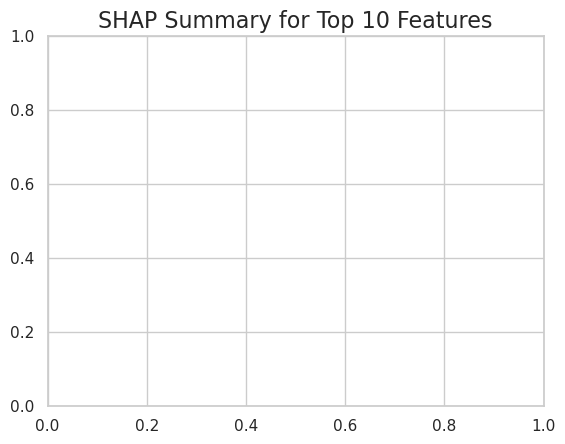

In [128]:
# plot
plt.title('SHAP Summary for Top 10 Features', size=16)
shap.summary_plot(shap_values[1], X_test_final, max_display=10, plot_size=[12,8])

Bisa kita lihat disini,disini ada 10 features yang paling berdampak ke model kita,jadi disini kalau kita lihat ada titik titik biru,titik ini,merepresentasikan customer atau data kita atau row,atau data poin.

Jadi disini cara bacanya,Recency itu merupakan features yang paling berdampak ke machine learning model kita,yang kedua itu adalah campaign nomer 3,terus ada Dt_Customer,campaign ke 5,campaign ke 1,jumlah total pengeluaran di gold products,ada Income juga,dan seterusnya.

Disini cara bacanya,disini X nya itu adalah shape value impact model output,dimana jika dia ke kanan,berarti dia memberikan dampak positif,artinya probabilitas untuk campaign itu di terima itu meningkat,sedangkan sebelah kitu itu menurun.

jadi disini Recency ini karena ini berwarna biru,jadi nilai warna bitu ini berarti dia artinya ketika recency nya itu rendah,itu cenderung akan memberikan dampak positif ke model,atau akan menaikan probabilitas response,probabilitas menerima campaign tersebut.

Recency itu sendiri adalah number of days since the last purchases,jadi kalu misalnya dia itu rendah nilainya karena disini warna biru itu rendah,artinya customer-customer yang baru saja membeli mungkin satu bulan atau 2 bulan lalu,itu cenderung meningkatkan probabilitas positif class,atau cenderung menerima penawaran campaign tersebut